In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gym import make as gym_make
from game import Game

In [2]:
env = gym_make('LunarLander-v2')

game = Game(env, True)
game.load()
game.start(1)

100%|██████████| 1/1 [00:14<00:00, 14.45s/it]


In [3]:
def plot_running_avg(totalrewards):
    episodes = len(totalrewards)
    running_avg = np.empty(episodes)
    for episode in range(episodes):
        running_avg[episode] = totalrewards[max(0, episode-100):(episode+1)].mean()
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

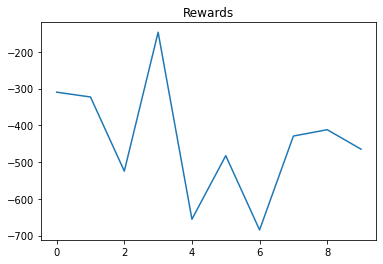

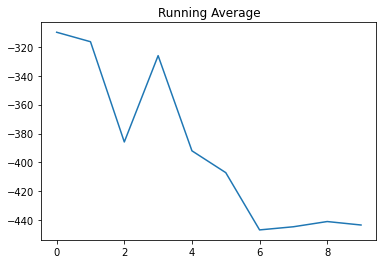

In [4]:
file = open("../saves/totalrewards.txt", 'r')
totalrewards = np.array([float(line.rstrip('\n')) for line in file])

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)